In [3]:
import numpy as np
import matplotlib.pyplot as plt
from json import load as json_load

In [4]:
bfs_times = []
dfs_times = []
tile_times = []

In [5]:
num = 5

In [6]:
for i in range(1, num+1):
    with open(f'Experiment{i}.json', 'rt') as fp:
        curr_json = json_load(fp)
    
    bfs_times.append(curr_json['bfsTimes'])
    dfs_times.append(curr_json['dfsTimes'])
    tile_times.append(curr_json['tileTimes'])

In [25]:
experiment_one_dfs = dfs_times[0]
experiment_one_bfs = bfs_times[0]
experiment_one_tile = tile_times[0]

In [26]:
def plot_np(func, data, axis, title):
    axis.plot(list(range(1, 101)), [func(data[:t]) for t in range(1, 101)])
    axis.set_title(title)

def plot_mean(data, axis, title):
    plot_np(np.mean, data, axis, title)

def plot_std(data, axis, title):
    plot_np(np.std, data, axis, title)

In [34]:
def plot_all(idx):
    experiment_dfs = dfs_times[idx]
    experiment_bfs = bfs_times[idx]
    experiment_tile = tile_times[idx]
    
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

    plot_mean(experiment_dfs, ax1, 'DFS Mean')
    plot_std(experiment_dfs, ax4, 'DFS Standard Deviation')

    plot_mean(experiment_bfs, ax2, 'BFS Mean')
    plot_std(experiment_bfs, ax5, 'BFS Standard Deviation')

    plot_mean(experiment_tile, ax3, 'Corner Mean')
    plot_std(experiment_tile, ax6, 'Corner Standard Deviation')

    fig.set_size_inches(15, 8)

    plt.show()

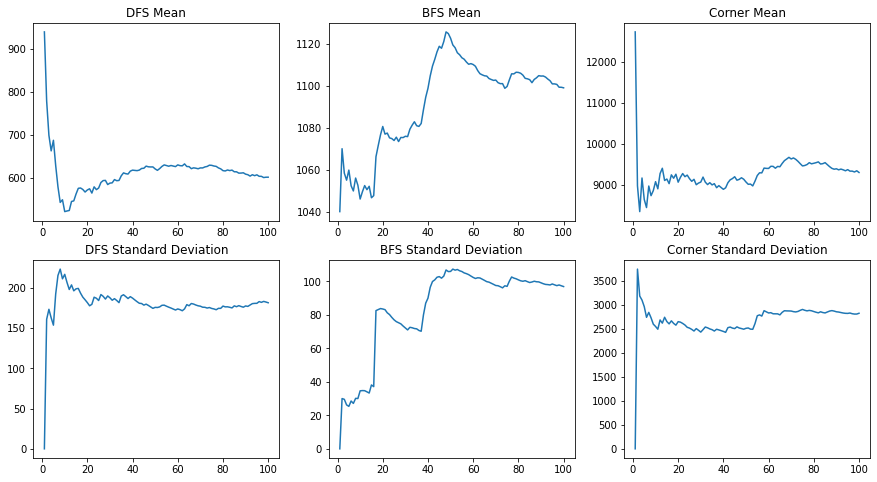

In [35]:
plot_all(0)

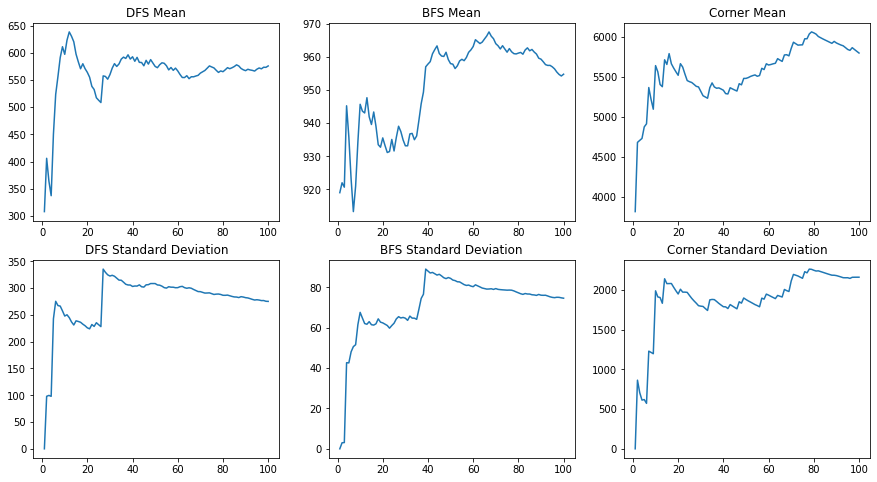

In [36]:
plot_all(1)

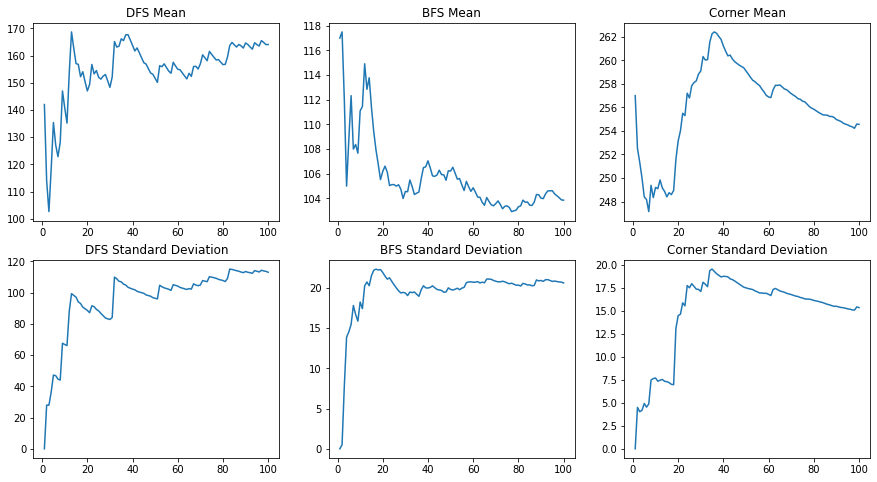

In [37]:
plot_all(2)

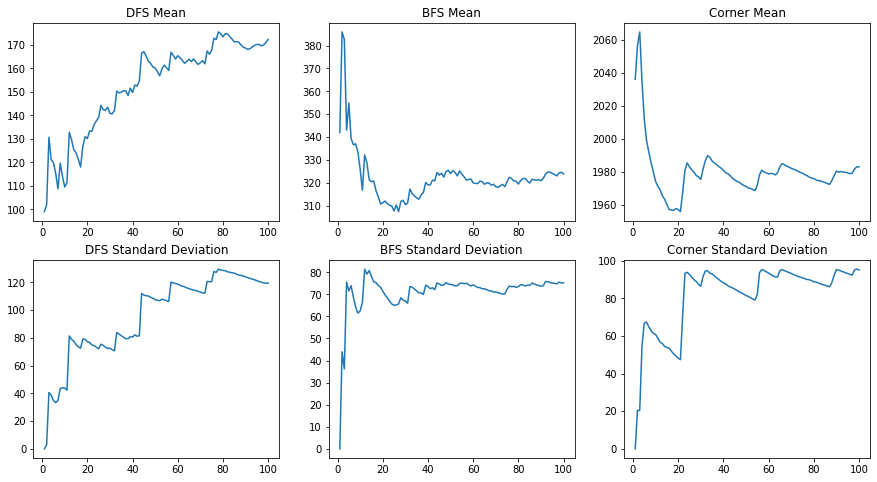

In [38]:
plot_all(3)

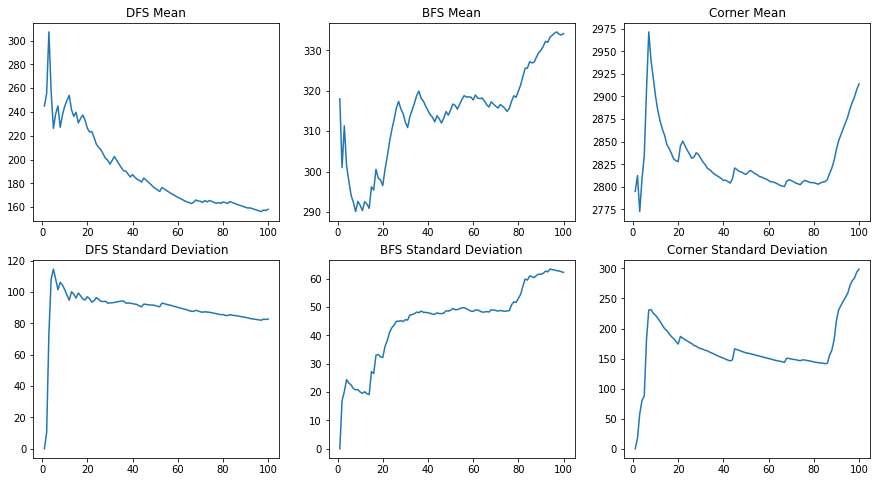

In [39]:
plot_all(4)